In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tqdm import tqdm
import shutil
import os
import matplotlib.pyplot as plt
from wrapper import train_model_v2

In [2]:
default_mnist = tfds.load('mnist', as_supervised=True)
rotated_mnist = tfds.load('mnist_corrupted/rotate', as_supervised=True)
noisy_mnist = tfds.load('mnist_corrupted/impulse_noise', as_supervised=True)

2022-02-03 10:23:42.245948: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<class 'numpy.ndarray'> <class 'numpy.int64'> 2


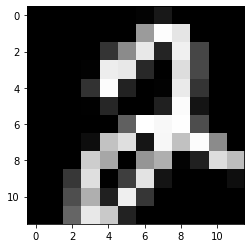

<class 'numpy.ndarray'> <class 'numpy.int64'> 0


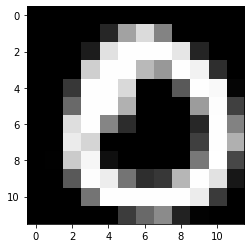

<class 'numpy.ndarray'> <class 'numpy.int64'> 4


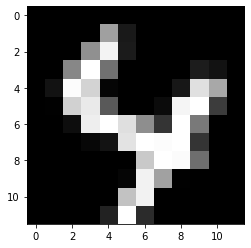

<class 'numpy.ndarray'> <class 'numpy.int64'> 8


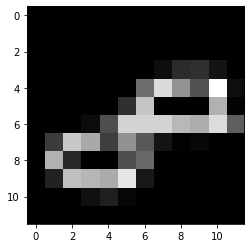

<class 'numpy.ndarray'> <class 'numpy.int64'> 7


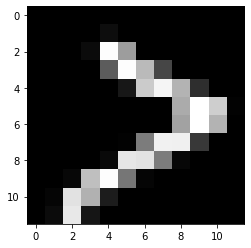

<class 'numpy.ndarray'> <class 'numpy.int64'> 6


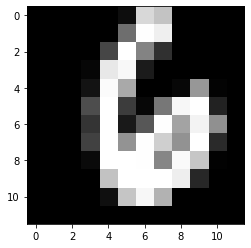

<class 'numpy.ndarray'> <class 'numpy.int64'> 0


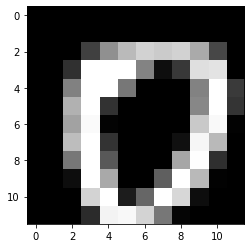

<class 'numpy.ndarray'> <class 'numpy.int64'> 6


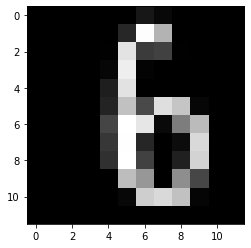

<class 'numpy.ndarray'> <class 'numpy.int64'> 3


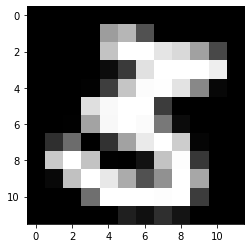

<class 'numpy.ndarray'> <class 'numpy.int64'> 1


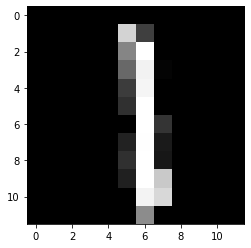

In [3]:
# Samples for downsampling
# [0,0] [0,2] [0,4] ...
# [2,0] [2,2] [2,4] ... 
# ...
set = rotated_mnist['test'].take(10)
for image, label in tfds.as_numpy(set):
    print(type(image), type(label), label)
    plt.imshow(image[2:26:2, 2:26:2], cmap='binary_r')
    plt.show()

In [4]:
def prepare_dataset(data):
    tmp = list()
    for image, label in tqdm(tfds.as_numpy(data['test']), desc='Loading Part I of Data'):
        tmp.append(np.ndarray.flatten(image[0:28:2, 0:28:2]))

    #for image, label in tqdm(tfds.as_numpy(data['train']), desc='Loading Part II of Data'):
    #    tmp.append(np.ndarray.flatten(image[0:28:2, 0:28:2]))
    
    return np.array(tmp).T

In [5]:
d_mnist = prepare_dataset(default_mnist)
r_mnist = prepare_dataset(rotated_mnist)
n_mnist = prepare_dataset(noisy_mnist)

Loading Part I of Data: 100%|██████████| 10000/10000 [00:01<00:00, 8286.05it/s]


SHAPE DATA Y! [ 20 500 196] [ 20 500 196]


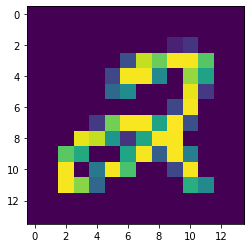

Epochs:   0%|          | 0/100000 [00:00<?, ?it/s]


ValueError: Input 0 is incompatible with layer model: expected shape=(None, 196), found shape=(20, 500, 196)

In [7]:
view1 = d_mnist
#shutil.rmtree(f'{os.getcwd()}/LOG/MNIST')
for ds in [r_mnist, n_mnist]:
    view2 = ds
    train_model_v2(data=[view1, view2], batch_size=500, shared_dim=10, hidden_dim=64, pca_dim=50)